In [ ]:
! pip install pandas matplotlib
# Knapsack NP complete could work
# or check for candidate DNSers that would be apart of the resource access and with enough resource access and DNS 
# could probably determine\


# What if determine candicate from DNSers like above but then look at their input to tor (frame size and timing 
# input and output with TDA to filter down candidates)

In [ ]:
# give shadow files old names

# import shutil
# import os
# import sys
# import re

# dr = "data/experiment0-0.0001"

# pattern = re.compile("^[0-9]*.[0-9]*.[0-9]*.[0-9]*..pcap")


# for root, dirs, files in os.walk(dr):
#     for file in files:
#         if pattern.match(file):
#             spl = root.split("/")
#             newname = spl[-1]
#             sup = ("/").join(spl[:-1])
#             shutil.move(root+"/"+file, sup+"/"+newname+"-"+file)

In [ ]:
# Get argus flows from PCAPs
#!../util/process_data_argus.sh

In [ ]:
# PCAP to CSV
#!../util/pcap_to_csv.sh

In [ ]:
# PCAPNG to CSV
#!../util/pcapng_to_csv.sh

In [1]:
from os import listdir
from os.path import isfile, join

def getFilenames(path):
    return [path+f for f in listdir(path) if isfile(join(path, f))]

In [2]:
# Get argus data
arguspath = "data/argus/csv/"
argusCSVs = getFilenames(arguspath)

# Get pcap data
pcappath = "data/csv/"
pcapCSVs = getFilenames(pcappath)
data = argusCSVs + pcapCSVs

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv (pcapCSVs[0])
df

,frame.number,frame.time,ip.src,ip.dst,ip.proto,frame.len,ip.len,ip.flags.df,ip.flags.mf,ip.fragment,...,dtls.handshake.extensions_alpn_str_len,dtls.handshake.extensions_key_share_client_length,http.request,udp.port,frame.time_relative,frame.time_delta,tcp.time_relative,tcp.time_delta,tcp.payload,dns.qry.name
0,1,"Dec 31, 1969 19:04:01.000000000 EST",102.0.0.85,100.0.0.2,6,40,40,1,0,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1,2,"Dec 31, 1969 19:04:01.100000000 EST",100.0.0.2,102.0.0.85,6,40,40,1,0,NaN,...,NaN,NaN,NaN,NaN,0.100000,0.100000,0.100000,0.100000,NaN,NaN
2,3,"Dec 31, 1969 19:04:01.100000000 EST",102.0.0.85,100.0.0.2,6,557,557,1,0,NaN,...,NaN,NaN,NaN,NaN,0.100000,0.000000,0.100000,0.000000,1603010200010001fc030303ec1b87d2f888b138adcfc6...,NaN
3,4,"Dec 31, 1969 19:04:01.200000000 EST",100.0.0.2,102.0.0.85,6,1211,1211,1,0,NaN,...,NaN,NaN,NaN,NaN,0.200000,0.100000,0.200000,0.100000,160303009b0200009703031640c97b387b6f6f78fcf04b...,NaN
4,5,"Dec 31, 1969 19:04:01.200000000 EST",102.0.0.85,100.0.0.2,6,120,120,1,0,NaN,...,NaN,NaN,NaN,NaN,0.200000,0.000000,0.200000,0.000000,1403030001011703030045157e4a14d6343917c0c1c820...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12617,12618,"Dec 31, 1969 21:59:52.321786000 EST",102.0.0.85,185.82.127.11,6,40,40,1,0,NaN,...,NaN,NaN,NaN,NaN,10551.321786,0.005000,10549.321786,0.005000,NaN,NaN
12618,12619,"Dec 31, 1969 21:59:55.580064000 EST",51.89.148.30,102.0.0.85,6,576,576,1,0,NaN,...,NaN,NaN,NaN,NaN,10554.580064,3.258278,737.450936,6.001000,17030302135917d9957699453bfbeaa91bffed8ce9c192...,NaN
12619,12620,"Dec 31, 1969 21:59:55.581064000 EST",102.0.0.85,51.89.148.30,6,40,40,1,0,NaN,...,NaN,NaN,NaN,NaN,10554.581064,0.001000,737.451936,0.001000,NaN,NaN
12620,12621,"Dec 31, 1969 21:59:59.470064000 EST",185.82.127.11,102.0.0.85,6,576,576,1,0,NaN,...,NaN,NaN,NaN,NaN,10558.470064,3.889000,10556.470064,7.148278,170303021337123983c572da509d91a3bf07eb0289591b...,NaN


In [5]:
len(data)

666

In [6]:
len(argusCSVs)

333

In [7]:
class PrivacyScope:

    def __init__(self, filenames, name):
        self.name = name
        self.filenames = filenames
        self.time_format = '%b %d, %Y %X.%f'
        self.time_col = 'frame.time'
        self.filter_func = lambda df, args: df
        self.df = None
        self.ip_search_enabled = False
        self.cache_search_enabled = False
        self.cache_timing = pd.Timedelta("300 seconds")
    
    def __str__(self):
        return "PrivacyScope(" + self.name + ")"

    def as_df(self, filenames=None):
        if self.df is not None:
            return self.df
        if filenames == None:
            filenames = self.filenames
        df = pd.DataFrame()
        for f in filenames:
            ddf = pd.read_csv (f)
            df = pd.concat([df, ddf])
        self.df = self.format_time_col(df)
        return self.df
        
    def get_ts(self):
        return None
    
    def format_time_col(self, df):
        df[self.time_col] = df[self.time_col].apply(lambda x: datetime.strptime(x[:-7], self.time_format))
        df.set_index(self.time_col)
        return df

    def pcap_only(self):
        r = re.compile(".*data/csv.*")
        return list(filter(r.match, self.filenames))
    
    def pcap_df(self):
        return self.as_df(filenames=self.pcap_only())
    
    def set_filter(self, filter_func):
        self.filter_func = filter_func
        
    def run_filter(self, args):
        return self.filter_func(self.as_df(), args)
    
    def filterByIP(self, ip, run_filter=True, args=None):
        df = self.as_df()
        if run_filter:
            df = self.run_filter(args)
        return df[((df['ip.dst'] == ip) | \
                                   (df['ip.src'] == ip))]

    def filterByCache(self, ip, cache_data, run_filter=True, args=None):
        df = self.as_df()
        if run_filter:
            df = self.run_filter(args)

        df_times = df[self.time_col].tolist()
        input_times = cache_data[self.time_col].tolist()
        keepers = [False] * len(df_times)
        idx = 0
        stop = len(input_times)
        for i in range(0, len(df_times)):
            if idx >= stop:
                break
            diff = input_times[idx] - df_times[i]
            if diff <= pd.Timedelta(0):
                idx += 1
            elif diff < self.cache_timing:
                keepers[i] = True
        
        return df[keepers]
    
    def search(self, ip=None, cache_data=None):
        matches = []
        if self.ip_search_enabled and ip is not None:
            matches += [self.filterByIP(ip)]
        if self.cache_search_enabled and cache_data is not None:
            matches += [self.filterByCache(ip, cache_data)]
        return matches

In [8]:
# Basic Scopes
import re

# Get all clients and ISP dns scope
r = re.compile(".*isp.csv|.*group[0-9]*user[0-9]*-(?!127\.0\.0\.1)[0-9]*.[0-9]*.[0-9]*.[0-9]*..csv")
ISP_scope = PrivacyScope(list(filter(r.match, data)), "ISP")


# Access to public resolver scope
r = re.compile(".*isp.csv")
Access_resolver = PrivacyScope(list(filter(r.match, data)), "Access_resolver")

r = re.compile("(.*tld).csv")
tld = PrivacyScope(list(filter(r.match, data)), "TLD")

r = re.compile("(.*root).csv")
root = PrivacyScope(list(filter(r.match, data)), "root")

r = re.compile("(.*sld).csv")
sld = PrivacyScope(list(filter(r.match, data)), "SLD")

# Access Tor Scope
r = re.compile(".*group[0-9]*user[0-9]*-(?!127\.0\.0\.1)[0-9]*.[0-9]*.[0-9]*.[0-9]*..csv")
Access_tor = PrivacyScope(list(filter(r.match, data)), "Access_tor")

# Server Public Scope
r = re.compile(".*myMarkovServer0*-(?!127\.0\.0\.1)[0-9]*\.[0-9]*\.[0-9]*\.[0-9]*.csv")
Server_scope = PrivacyScope(list(filter(r.match, data)), "Server_of_interest")

# tor Exit scope
r = re.compile(".*exit.*")
Tor_exit_Scope = PrivacyScope(list(filter(r.match, data)), "Tor_exit")

# tor Guard scope
r = re.compile(".*guard.*")
Tor_guard_Scope = PrivacyScope(list(filter(r.match, data)), "Tor_guard")

# tor Relay scope
r = re.compile(".*relay.*")
Tor_relay_Scope = PrivacyScope(list(filter(r.match, data)), "Tor_relay")

# tor Middle scope
r = re.compile(".*middle.*")
Tor_middle_Scope = PrivacyScope(list(filter(r.match, data)), "Tor_middle")

# tor 4uthority scope
r = re.compile(".*4uthority.*")
Tor_4uthority_Scope = PrivacyScope(list(filter(r.match, data)), "Tor_4uthority")

# resolver scope
r = re.compile(".*resolver.*")
resolver = PrivacyScope(list(filter(r.match, data)), "resolver")

In [9]:
from datetime import datetime

def df_to_ts(df):
    df['count'] = 1
    #  Minute is T
    tmp = df.set_index('frame.time').infer_objects()
#     print("1:\t" + str(tmp))
    tmp = tmp.resample('3S').sum(numeric_only=True).infer_objects()
#     print("2:\t" + str(tmp))
    #tmp = tmp.rolling(10).sum(numeric_only=True)
    #print("3:\t" + str(tmp))
    return tmp.reset_index()

In [10]:
# get start time for GNS3
GNS3_data = pd.concat([Access_resolver.pcap_df(), sld.pcap_df(), tld.pcap_df(), root.pcap_df()])
GNS3_starttime = GNS3_data.head(1)['frame.time'].tolist()[0]
Shadow_starttime = datetime.strptime('Dec 31, 1969 19:30:00', '%b %d, %Y %X')
Shadow_offset = GNS3_starttime - Shadow_starttime
Shadow_offset

/tmp/ipykernel_1008709/2845000550.py:24: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  ddf = pd.read_csv (f)


Timedelta('19441 days 13:39:26.634647')

In [11]:
#dns_df = Access_to_auth_zone.pcap_df()

In [12]:
window = pd.Timedelta("300 seconds") # cache size but maybe smaller 

# detect and remove solo quries
# these can easily be handled on their own as only 1 device is accessing the network at that moment
def detect_solo(df_list):
    new_df = df_list[df_list['ip.src'].ne(df_list['ip.src'].shift())]
    new_df['diff'] = new_df['frame.time'].diff()
    new_df = new_df[new_df['diff'] > window]
    solo_ips = new_df['ip.src'].unique()
    return solo_ips

def handle_solo(solo):
    print("IPs that must trigger a cache miss: " + str(solo))
    
def solo_pipeline(df_list):
    fil = df_list[['ip.src', 'frame.time']]
    solo = detect_solo(fil)
    handle_solo(solo)
    return solo

In [13]:
def combineScopes(dfs):
    if len(dfs) < 1:
        return dfs
    return pd.concat(dfs)

def scopesToTS(dfs):
    output = []
    for df in dfs:
        if len(df) < 2:
            continue
        output += scopeToTS(df)
    return output
def scopeToTS(df):
    return df_to_ts(df.copy()).set_index('frame.time')

In [14]:
# Setup filters for different scopes
evil_domain = 'evil.dne'
DNS_PROTO = 17.0

dns_filter = lambda df, ip: df[(df['dns.qry.name'] == evil_domain )
                                            | (df['dns.qry.name'] == "") & (df['ip.proto'] == DNS_PROTO)]
resolver.set_filter(dns_filter)
root.set_filter(dns_filter)
tld.set_filter(dns_filter)
sld.set_filter(dns_filter)


resolver.ip_search_enabled = True
resolver.cache_search_enabled = False

root.ip_search_enabled = True
root.cache_search_enabled = True

sld.ip_search_enabled = True
sld.cache_search_enabled = True

tld.ip_search_enabled = True
tld.cache_search_enabled = True

In [39]:
# Cluster DNS
## Create ts for each IP
resolv_df = resolver.pcap_df()
resolv_df_filtered = resolv_df[resolv_df['ip.proto'] == DNS_PROTO]
IPs = resolv_df_filtered['ip.src'].unique()
flows_ip = {}
flows_ts_ip_scoped = {}
flows_ts_ip_total = {}
infra_ip = ['172.20.0.11', '172.20.0.12', '192.168.150.10', '172.20.0.10']
first_pass = resolv_df_filtered[((~resolv_df_filtered['ip.src'].isin(infra_ip)))  \
                                         & (resolv_df_filtered['dns.qry.name'] == evil_domain)]
solo = solo_pipeline(first_pass)

# Add all scope data to IPs found in resolver address space
# This should be a valid topo sorted list of the scopes (it will be proccessed in order)
scopes = [resolver, root, tld, sld]
cache_window = window # see above 
print("scopes: " + str(scopes))
print("cache window: " + str(cache_window))

for ip in IPs:
    # Don't add known infra IPs or users that can are solo communicaters
    if ip in infra_ip or ip in solo:
        continue
    flows_ip[ip] = pd.DataFrame()
    flows_ts_ip_scoped[ip] = pd.DataFrame()
    flows_ts_ip_total[ip] = pd.DataFrame()
    for scope in scopes:
#         print(scope)
        # Find matches
        matches = scope.search(ip, flows_ip[ip])
        
        # Update df for ip
        combined_scope = combineScopes(matches)
        combined_scope["scope_name"]=scope.name
        flows_ip[ip] =combineScopes([flows_ip[ip],combined_scope])
        
        # update ts for ip
        new_ts_matches = scopeToTS(combined_scope)
#         print(combined_scope)
#         print(new_ts_matches)
        if len(new_ts_matches) == 0:
            continue
        new_ts_matches["scope_name"]=scope.name
        flows_ts_ip_scoped[ip] = combineScopes([flows_ts_ip_scoped[ip], new_ts_matches])
    if len(flows_ip[ip]) > 0:
        flows_ts_ip_total[ip] = scopeToTS(flows_ip[ip])
        
        flows_ip[ip] = flows_ip[ip].set_index('frame.time')
        
        flows_ip[ip].sort_index(inplace=True)
        flows_ts_ip_scoped[ip].sort_index(inplace=True)
        flows_ts_ip_total[ip].sort_index(inplace=True)
        
        # Preserve time col to be used for automated feautre engineering
        flows_ip[ip]['frame.time'] = flows_ip[ip].index
        flows_ts_ip_total[ip]['frame.time'] = flows_ts_ip_total[ip].index
        
        flows_ip[ip]["scope_name"] = flows_ip[ip]["scope_name"].astype('category')
        flows_ts_ip_scoped[ip]["scope_name"] = flows_ts_ip_scoped[ip]["scope_name"].astype('category')

/tmp/ipykernel_1008709/1875783797.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['diff'] = new_df['frame.time'].diff()


IPs that must trigger a cache miss: ['102.0.0.38' '102.0.0.8' '102.0.0.5' '102.0.0.22']
scopes: [<__main__.PrivacyScope object at 0x7fc9e703cca0>, <__main__.PrivacyScope object at 0x7fc9e703cb20>, <__main__.PrivacyScope object at 0x7fc9e703f460>, <__main__.PrivacyScope object at 0x7fc9e703f280>]
cache window: 0 days 00:05:00


In [40]:
flows_ip[ip]['dns.qry.name'].unique()

array(['evil.dne'], dtype=object)

In [41]:
flows_ip[ip]

,frame.number,ip.src,ip.dst,ip.proto,frame.len,ip.len,ip.flags.df,ip.flags.mf,ip.fragment,ip.fragment.count,...,http.request,udp.port,frame.time_relative,frame.time_delta,tcp.time_relative,tcp.time_delta,tcp.payload,dns.qry.name,scope_name,frame.time
frame.time,,,,,,,,,,,,,,,,,,,,,
2023-03-25 09:15:28.270235,1127,192.168.150.10,172.20.0.11,17.0,79,65.0,0.0,0.0,NaN,NaN,...,NaN,41462.0,346.080292,0.383979,NaN,NaN,NaN,evil.dne,TLD,2023-03-25 09:15:28.270235
2023-03-25 09:15:28.270654,1131,172.20.0.11,192.168.150.10,17.0,236,222.0,0.0,0.0,NaN,NaN,...,NaN,53.0,346.080711,0.000278,NaN,NaN,NaN,evil.dne,TLD,2023-03-25 09:15:28.270654
2023-03-25 09:15:28.361532,1572,192.168.150.10,172.20.0.12,17.0,79,65.0,0.0,0.0,NaN,NaN,...,NaN,40567.0,331.788971,0.434605,NaN,NaN,NaN,evil.dne,SLD,2023-03-25 09:15:28.361532
2023-03-25 09:15:28.362018,1573,172.20.0.12,192.168.150.10,17.0,328,314.0,0.0,0.0,NaN,NaN,...,NaN,53.0,331.789457,0.000486,NaN,NaN,NaN,evil.dne,SLD,2023-03-25 09:15:28.362018
2023-03-25 09:15:33.054339,1593,192.168.150.10,172.20.0.12,17.0,79,65.0,0.0,0.0,NaN,NaN,...,NaN,43953.0,336.481778,1.475954,NaN,NaN,NaN,evil.dne,SLD,2023-03-25 09:15:33.054339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-25 09:17:18.487507,15816,192.168.150.10,102.0.0.101,17.0,135,121.0,0.0,0.0,NaN,NaN,...,NaN,53.0,486.384193,0.000062,NaN,NaN,NaN,evil.dne,resolver,2023-03-25 09:17:18.487507
2023-03-25 09:17:18.578477,15819,102.0.0.101,192.168.150.10,17.0,68,54.0,1.0,0.0,NaN,NaN,...,NaN,51383.0,486.475163,0.000025,NaN,NaN,NaN,evil.dne,resolver,2023-03-25 09:17:18.578477
2023-03-25 09:17:18.578495,15820,102.0.0.101,192.168.150.10,17.0,68,54.0,1.0,0.0,NaN,NaN,...,NaN,51383.0,486.475181,0.000018,NaN,NaN,NaN,evil.dne,resolver,2023-03-25 09:17:18.578495


In [42]:
flows_ts_ip_total[ip]

,frame.number,ip.proto,frame.len,ip.len,ip.flags.df,ip.flags.mf,ip.fragment,ip.fragment.count,ip.fragments,ip.ttl,...,dtls.handshake.extensions_key_share_client_length,http.request,udp.port,frame.time_relative,frame.time_delta,tcp.time_relative,tcp.time_delta,tcp.payload,count,frame.time
frame.time,,,,,,,,,,,,,,,,,,,,,
2023-03-25 09:15:27,5403,68.0,722,666.0,0.0,0.0,0.0,0.0,0.0,252.0,...,0.0,0.0,82135.0,1355.739431,0.819348,0.0,0.0,0.0,4,2023-03-25 09:15:27
2023-03-25 09:15:30,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,2023-03-25 09:15:30
2023-03-25 09:15:33,3187,34.0,505,477.0,0.0,0.0,0.0,0.0,0.0,126.0,...,0.0,0.0,44006.0,672.964205,1.476603,0.0,0.0,0.0,2,2023-03-25 09:15:33
2023-03-25 09:15:36,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,2023-03-25 09:15:36
2023-03-25 09:15:39,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,2023-03-25 09:15:39
2023-03-25 09:15:42,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,2023-03-25 09:15:42
2023-03-25 09:15:45,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,2023-03-25 09:15:45
2023-03-25 09:15:48,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,2023-03-25 09:15:48
2023-03-25 09:15:51,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,2023-03-25 09:15:51


In [43]:
# extract scope order
flows_ip[ip]["scope_name"].cat.codes

frame.time
2023-03-25 09:15:28.270235    1
2023-03-25 09:15:28.270654    1
2023-03-25 09:15:28.361532    0
2023-03-25 09:15:28.362018    0
2023-03-25 09:15:33.054339    0
                             ..
2023-03-25 09:17:18.487507    2
2023-03-25 09:17:18.578477    2
2023-03-25 09:17:18.578495    2
2023-03-25 09:17:18.581197    2
2023-03-25 09:17:18.581265    2
Length: 62, dtype: int8

In [44]:
## Viz
# importing Libraries
  
# import pandas as pd
import pandas as pd
  
# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

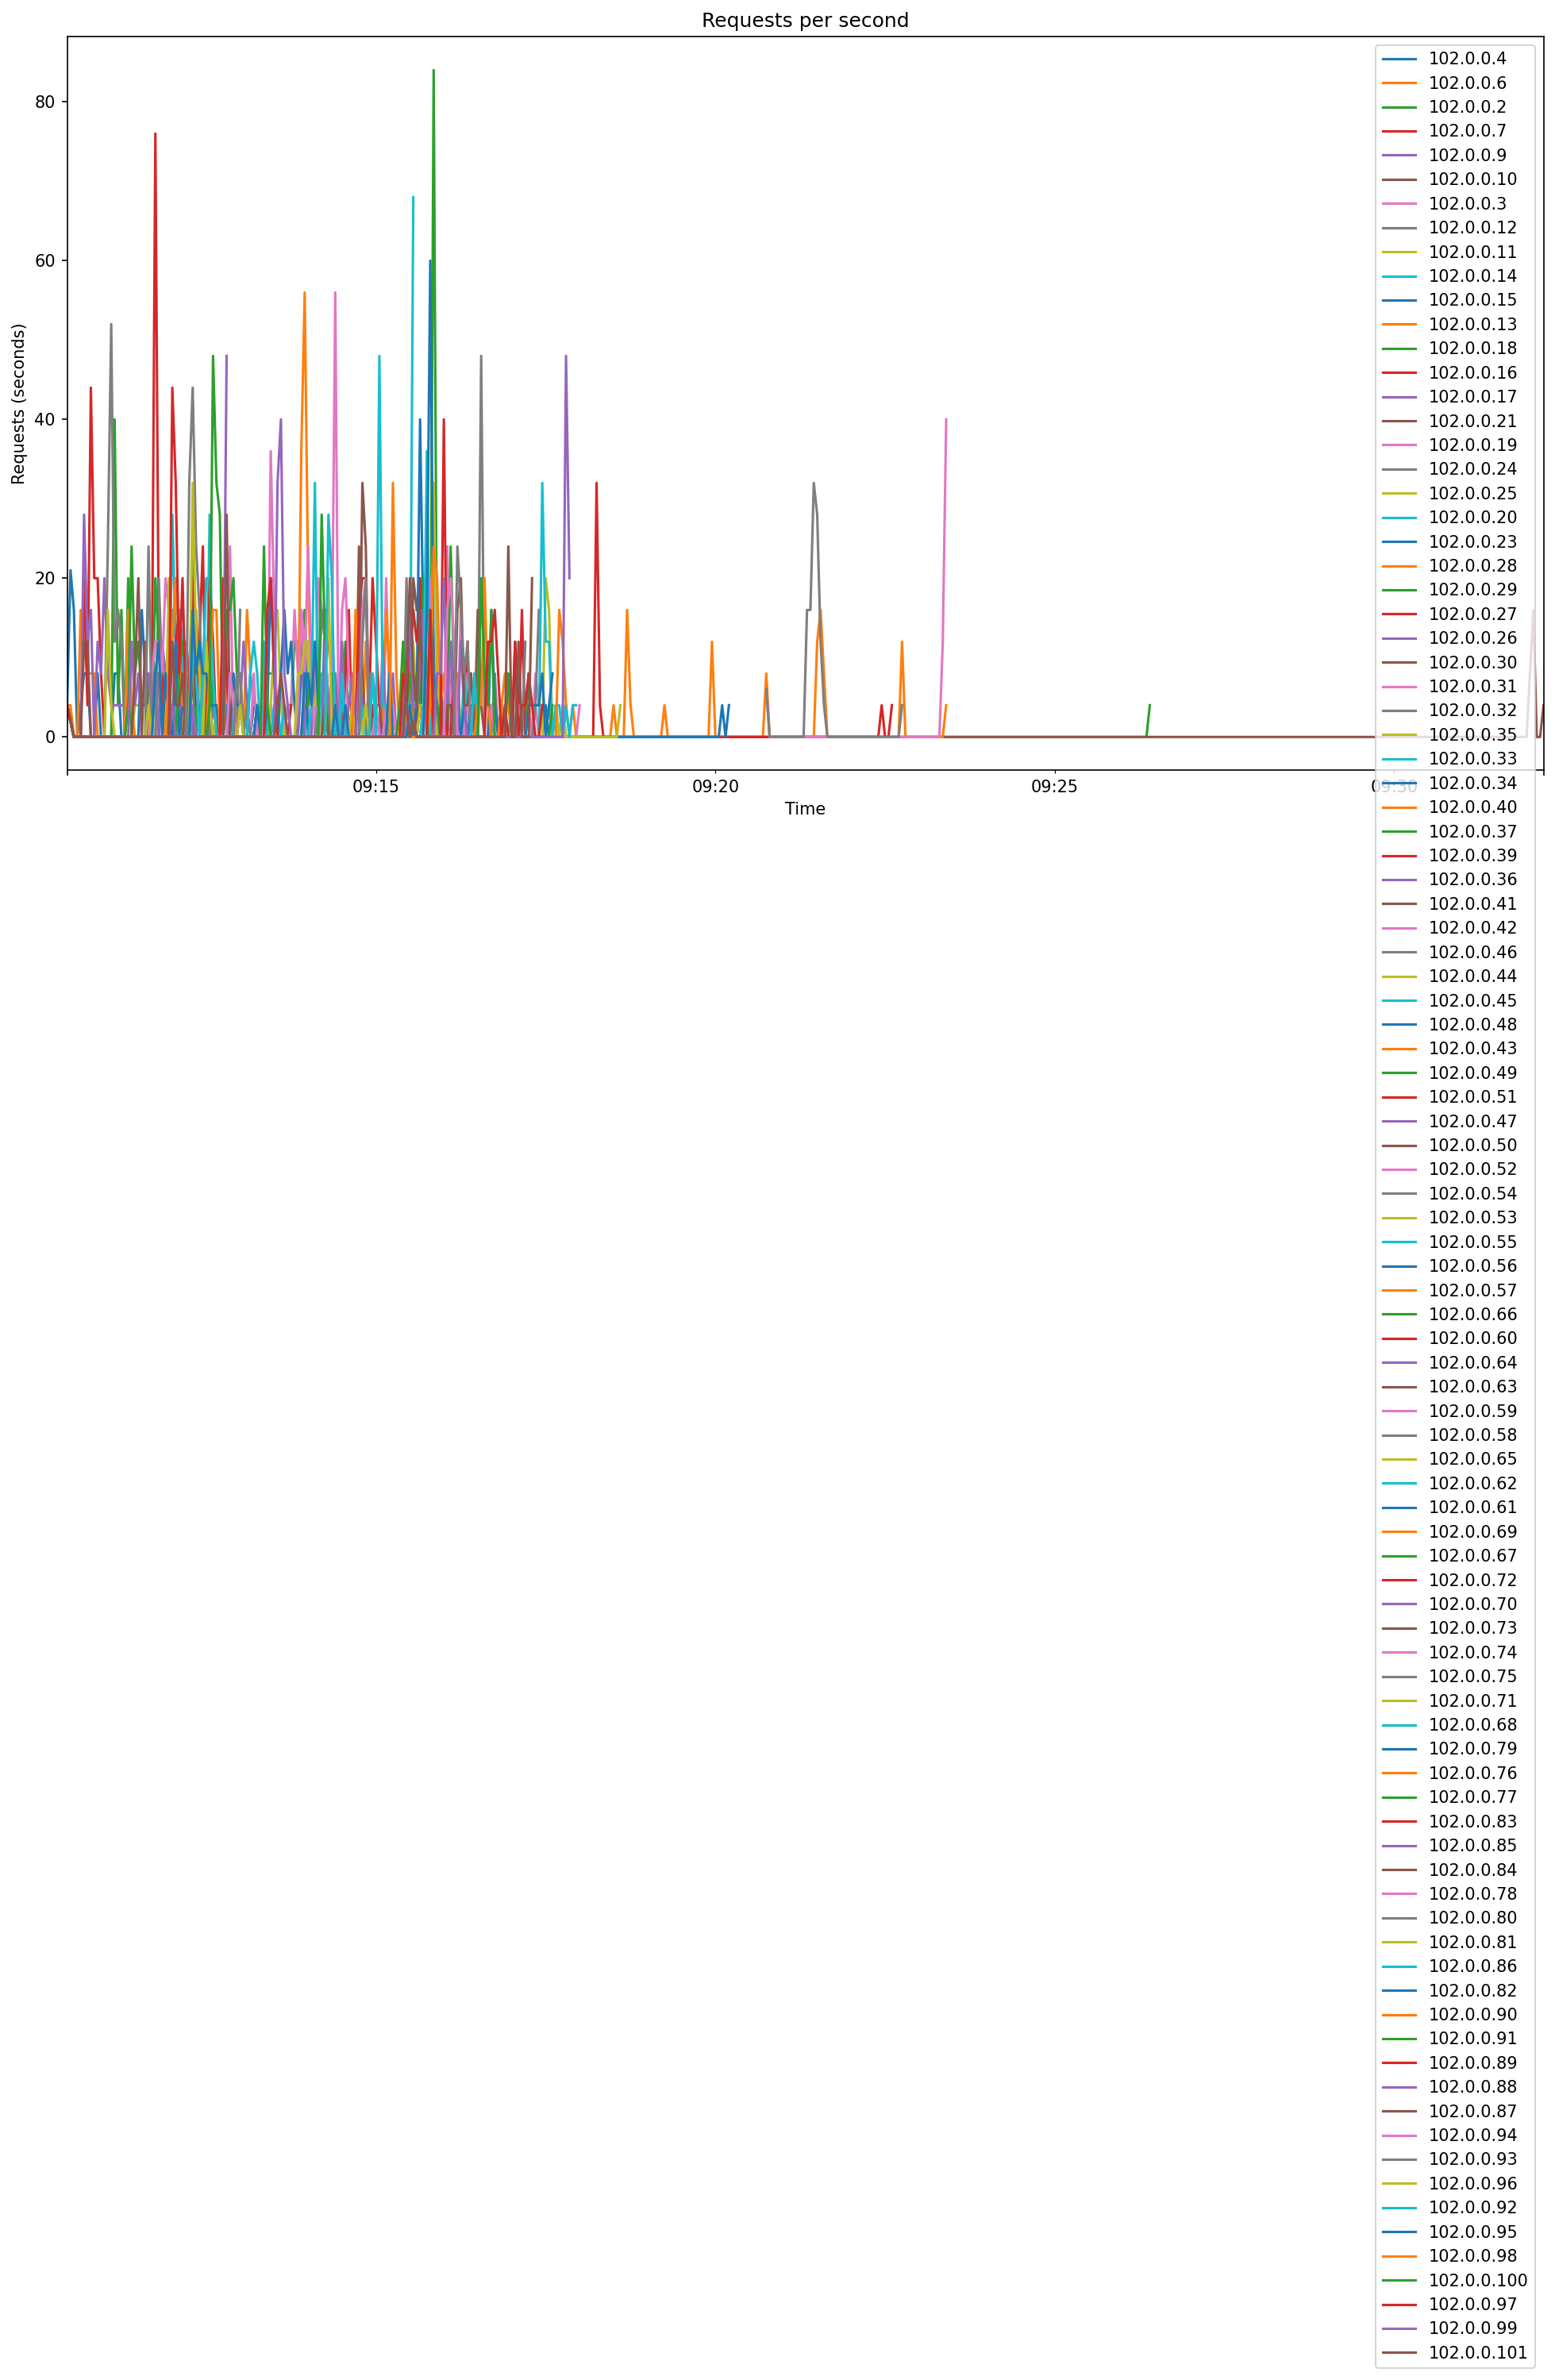

In [45]:
# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.

for f in flows_ts_ip_total:
    flows_ts_ip_total[f]['count'].plot(label=f)
  
plt.title('Requests per second')
  
# adding Label to the x-axis
plt.xlabel('Time')
plt.ylabel('Requests (seconds)')
  
# adding legend to the curve
plt.legend()

In [46]:
!pip install scikit-learn
from sklearn.cluster import KMeans
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


In [47]:
def generate_features(df, flow):
    features = []
    # 'first_seen'
    features += [float(df['frame.time'].min().timestamp())]
    # 'last_seen'
    features += [float(df['frame.time'].max().timestamp())]
    # 'reqs_per_sec'
    features += [flow['count'].mean()]
    # 'reqs_per_sec_std'
    val = flow['count'].std()
    features += [0 if np.isnan(val) else val]
    # 'total_req'
    features += [len(df)]
    # 'reqs_max'
    features += [flow['count'].max()]
    # 'reqs_min'
    features += [flow['count'].min()]
    return [features]
## Get flow features
def all_features(df, flow, bad):
    df = df.drop(columns=bad)
    df_mean = df.median(numeric_only=True).add_suffix('_mean').to_frame().transpose()
    df_min = df.min(numeric_only=True).add_suffix('_min').to_frame().transpose()
    df_max = df.max(numeric_only=True).add_suffix('_max').to_frame().transpose()
    df_range = df.max(numeric_only=True) - df.min(numeric_only=True)
    df_range = df_range.add_suffix('_range').to_frame().transpose()
    df_std = df.std(numeric_only=True).add_suffix('_std').to_frame().transpose()
    
    flow = flow.drop(columns=bad)
    ts_mean = flow.mean(numeric_only=True).add_suffix('_mean_ts').to_frame().transpose()
    ts_min = flow.min(numeric_only=True).add_suffix('_min_ts').to_frame().transpose()
    ts_max = flow.max(numeric_only=True).add_suffix('_max_ts').to_frame().transpose()
    ts_range = flow.max(numeric_only=True) - flow.min(numeric_only=True)
    ts_range = ts_range.add_suffix('_range_ts').to_frame().transpose()
    ts_std = flow.std(numeric_only=True).add_suffix('_std_ts').to_frame().transpose()
    
    return pd.concat([df_mean, df_min, df_max, df_std, df_range, ts_mean, ts_min, ts_max, ts_std, ts_range], axis=1)
cols = ['first_seen','last_seen', 'reqs_per_sec', 'reqs_per_sec_std', 'total_req', 'reqs_max', 'reqs_min']
index = []
feature_data = []
all_f = pd.DataFrame()
bad_features = ['udp.port', 'frame.number']
for ip in flows_ts_ip_total:
    index += [ip]
    feature_data += generate_features(flows_ip[ip], flows_ts_ip_total[ip])
    all_tmp = all_features(flows_ip[ip], flows_ts_ip_total[ip], bad_features)
    all_tmp.index = [ip]
    all_f = pd.concat([all_f, all_tmp], axis=0)

    # drop col if all na
all_f = all_f.dropna(axis=1, how='all')
# drop col if all same value
nunique = all_f.nunique()
cols_to_drop = nunique[nunique == 1].index
all_f = all_f.drop(cols_to_drop, axis=1)

# Create the pandas DataFrame
df_old = pd.DataFrame(feature_data, columns=cols, index=index)
df = all_f
df

,frame.len_mean,ip.len_mean,ip.ttl_mean,frame.time_relative_mean,frame.time_delta_mean,ip.ttl_min,frame.time_relative_min,frame.time_delta_min,frame.len_max,ip.len_max,...,frame.time_delta_std_ts,count_std_ts,ip.proto_range_ts,frame.len_range_ts,ip.len_range_ts,ip.flags.df_range_ts,ip.ttl_range_ts,frame.time_relative_range_ts,frame.time_delta_range_ts,count_range_ts
102.0.0.4,84.0,70.0,64.0,92.062594,0.000683,63.0,31.141357,0.000335,426.0,412.0,...,0.255975,4.186830,357.0,2201.0,1907.0,10.0,1334.0,1647.901934,1.306019,21.0
102.0.0.6,81.5,67.5,63.5,90.805793,0.000342,62.0,31.140894,0.000024,328.0,314.0,...,0.415289,2.705661,272.0,1420.0,1196.0,8.0,1016.0,1429.490457,2.779894,16.0
102.0.0.2,81.5,67.5,63.5,183.435259,0.000342,62.0,31.140894,0.000037,426.0,412.0,...,0.158504,3.347618,680.0,3550.0,2990.0,20.0,2540.0,4713.549447,1.670849,40.0
102.0.0.7,81.5,67.5,63.5,152.280448,0.000295,62.0,31.140894,0.000020,426.0,412.0,...,0.412119,15.079175,1292.0,6745.0,5681.0,38.0,4826.0,11758.570289,1.621879,76.0
102.0.0.9,81.5,67.5,63.5,103.130648,0.000305,62.0,31.140894,0.000018,426.0,412.0,...,0.441274,7.929839,476.0,2485.0,2093.0,14.0,1778.0,2563.347646,1.789190,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102.0.0.98,81.5,67.5,63.5,448.086406,0.000354,62.0,331.788971,0.000033,426.0,412.0,...,0.261718,4.089209,340.0,1775.0,1495.0,10.0,1270.0,8930.639346,1.476603,20.0
102.0.0.100,81.5,67.5,63.5,446.654022,0.000181,62.0,331.788971,0.000019,426.0,412.0,...,0.261272,4.139992,340.0,1775.0,1495.0,10.0,1270.0,8857.959854,1.476603,20.0
102.0.0.97,81.5,67.5,63.5,455.928958,0.000179,62.0,331.788971,0.000019,426.0,412.0,...,0.268797,4.184757,272.0,1420.0,1196.0,8.0,1016.0,7262.506487,1.476603,16.0
102.0.0.99,81.5,67.5,63.5,518.331778,0.000440,62.0,331.788971,0.000021,426.0,412.0,...,0.254049,7.377111,816.0,4260.0,3588.0,24.0,3048.0,24873.553567,1.476603,48.0


In [48]:
import math
def ip_to_group(ip):
    if ip.split(".")[0] != '102':
        return -1
    return math.floor((int(ip.split(".")[-1])-2) / 5)
def get_real_label(df):
    data = df.index.values
    result = np.array([ip_to_group(xi) for xi in data])
    return result

In [49]:
answers = get_real_label(df)

In [50]:
# dt_features = ['frame.time_relative_mean', 'frame.time_relative_std']
# df = df[dt_features]

In [51]:
from sklearn import tree

X = df
Y = answers

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=10)
clf = clf.fit(X, Y)

Defaulting to user installation because normal site-packages is not writeable


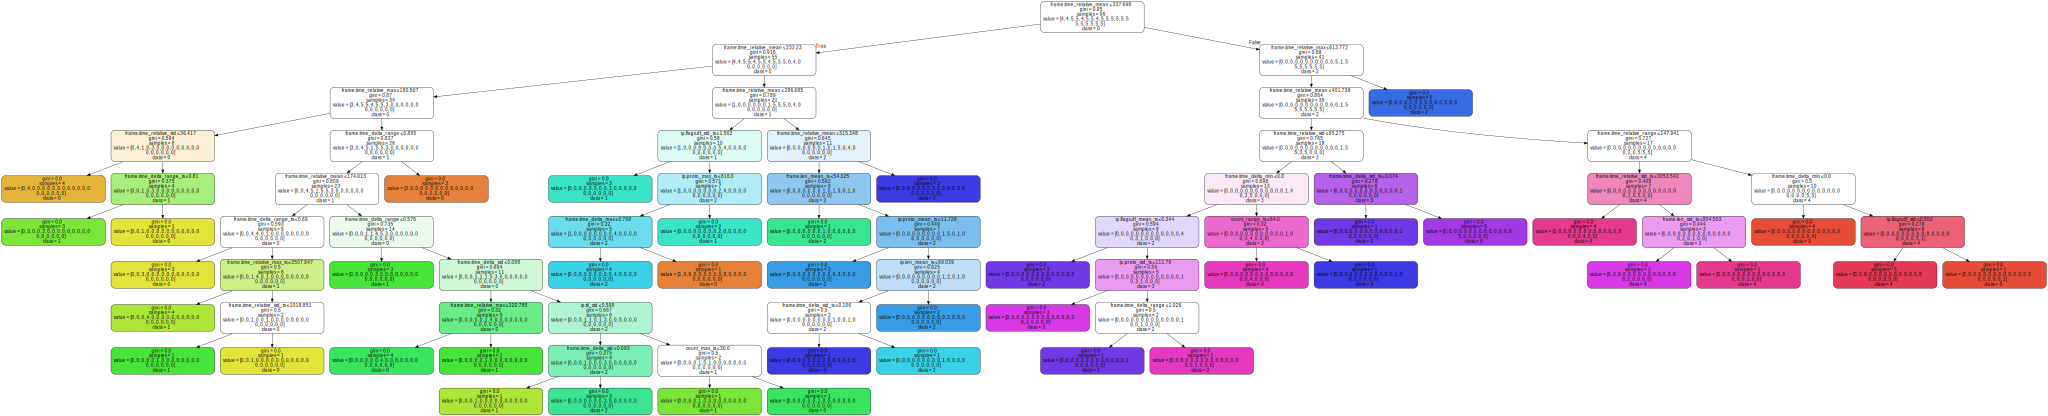

In [52]:
!pip install graphviz
# sudo apt install -y graphviz
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=df.columns,  
                      class_names=Y.astype(str),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [53]:
# best frame.time_relative_mean, frame.time_relative_std
# dt_features = ['frame.time_relative_mean', 'frame.time_relative_max', 'frame.time_delta_range']
# df = df[dt_features]

In [54]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df = normalized_df.fillna(0)
normalized_df

,frame.len_mean,ip.len_mean,ip.ttl_mean,frame.time_relative_mean,frame.time_delta_mean,ip.ttl_min,frame.time_relative_min,frame.time_delta_min,frame.len_max,ip.len_max,...,frame.time_delta_std_ts,count_std_ts,ip.proto_range_ts,frame.len_range_ts,ip.len_range_ts,ip.flags.df_range_ts,ip.ttl_range_ts,frame.time_relative_range_ts,frame.time_delta_range_ts,count_range_ts
102.0.0.4,1.0,1.0,1.0,0.001650,1.000000,1.0,7.475496e-07,1.000000,1.0,1.0,...,0.517544,0.229585,0.171053,0.219664,0.221094,0.157895,0.171156,0.015888,0.330983,0.171053
102.0.0.6,0.0,0.0,0.0,0.000000,0.438322,0.0,0.000000e+00,0.018927,0.0,0.0,...,0.910684,0.124821,0.105263,0.103668,0.094424,0.105263,0.105263,0.009268,1.000000,0.105263
102.0.0.2,0.0,0.0,0.0,0.121643,0.438322,0.0,0.000000e+00,0.059937,1.0,1.0,...,0.277014,0.170227,0.421053,0.420021,0.414039,0.421053,0.421053,0.108814,0.496586,0.421053
102.0.0.7,0.0,0.0,0.0,0.080730,0.362664,0.0,0.000000e+00,0.006309,1.0,1.0,...,0.902862,1.000000,0.894737,0.894549,0.893462,0.894737,0.894737,0.322363,0.474358,0.894737
102.0.0.9,0.0,0.0,0.0,0.016185,0.378289,0.0,0.000000e+00,0.000000,1.0,1.0,...,0.974807,0.494328,0.263158,0.261845,0.254231,0.263158,0.263158,0.043637,0.550303,0.263158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102.0.0.98,0.0,0.0,0.0,0.469187,0.459704,0.0,4.854198e-01,0.047319,1.0,1.0,...,0.531715,0.222680,0.157895,0.156394,0.147693,0.157895,0.157895,0.236643,0.408414,0.157895
102.0.0.100,0.0,0.0,0.0,0.467306,0.174342,0.0,4.854198e-01,0.003155,1.0,1.0,...,0.530614,0.226272,0.157895,0.156394,0.147693,0.157895,0.157895,0.234440,0.408414,0.157895
102.0.0.97,0.0,0.0,0.0,0.479486,0.171875,0.0,4.854198e-01,0.003155,1.0,1.0,...,0.549183,0.229438,0.105263,0.103668,0.094424,0.105263,0.105263,0.186078,0.408414,0.105263
102.0.0.99,0.0,0.0,0.0,0.561434,0.599507,0.0,4.854198e-01,0.009464,1.0,1.0,...,0.512792,0.455233,0.526316,0.525472,0.520577,0.526316,0.526316,0.719904,0.408414,0.526316


In [55]:
from sklearn import metrics
from statistics import mean

# compute cluster purity
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [60]:
def my_kMeans(df):
    df = df.copy(deep=True)
    kmeans = KMeans(n_clusters=30, random_state=0, n_init='auto')
    df.loc[:,'cluster'] = kmeans.fit_predict(df)# get centroids
    df.loc[:,'real_label'] = answers
    #plt.scatter(df['frame.time_relative_min'], df['frame.time_delta_mean'], c=answers, alpha = 1, s=10)

    s = 0
    total = 0
    for c in df['cluster'].unique():
        selection = df[df['cluster'] == c]
        p = purity_score(selection['real_label'], selection['cluster'])
        total += len(selection)
        s += p * len(selection)
#         print(selection[['cluster', 'real_label']])
#         print(str(c) + ": " + str(p))
    return s/total
purity = my_kMeans(df[['frame.time_delta_mean', 'frame.time_relative_min', 'frame.time_relative_std']])
print("Average purity: " + str(purity))

Average purity: 0.46875


In [61]:
# Find best features 
import itertools
 
def findsubsets(s, n):
    return list(itertools.combinations(s, n))

def iterate_features(df, n):
    features = df.columns
    best_features = []
    best_score = 0.0
    for subset in findsubsets(features, n):
        subset = list(subset)
        score = my_kMeans(df[subset])

        if score > best_score:
            best_score = score
            best_features = subset
            print(best_score)
            print(best_features)
    return best_features

for n in range(1,5):
    best_features = iterate_features(df, n)
    

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (30). Possibly due to duplicate poi

0.0625
['frame.len_mean']
0.5625
['frame.time_relative_mean']


/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate po

0.0625
['frame.len_mean', 'ip.len_mean']
0.5625
['frame.len_mean', 'frame.time_relative_mean']


/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate po

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

0.5833333333333334
['frame.time_relative_mean', 'frame.time_relative_min']
0.59375
['frame.time_relative_mean', 'frame.len_max']
0.6145833333333334
['frame.time_relative_mean', 'frame.len_std']


/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate po

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate po

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

0.0625
['frame.len_mean', 'ip.len_mean', 'ip.ttl_mean']
0.5625
['frame.len_mean', 'ip.len_mean', 'frame.time_relative_mean']


/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate po

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

0.5833333333333334
['frame.len_mean', 'frame.time_relative_mean', 'frame.time_relative_min']
0.59375
['frame.len_mean', 'frame.time_relative_mean', 'frame.len_max']
0.6145833333333334
['frame.len_mean', 'frame.time_relative_mean', 'frame.len_std']


/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate po

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate po

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate po

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate po

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

0.6354166666666666
['frame.time_relative_mean', 'frame.time_relative_min', 'ip.proto_mean_ts']


/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (24) found smaller than n_clusters (30). Possibly due to duplicate p

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate po

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate 

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

0.5625
['frame.len_mean', 'ip.len_mean', 'ip.ttl_mean', 'frame.time_relative_mean']


/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate po

0.5833333333333334
['frame.len_mean', 'ip.len_mean', 'frame.time_relative_mean', 'frame.time_relative_min']
0.59375
['frame.len_mean', 'ip.len_mean', 'frame.time_relative_mean', 'frame.len_max']
0.6145833333333334
['frame.len_mean', 'ip.len_mean', 'frame.time_relative_mean', 'frame.len_std']


/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate po

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate po

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate 

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate 

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


0.6354166666666666
['frame.len_mean', 'frame.time_relative_mean', 'frame.time_relative_min', 'ip.proto_mean_ts']


/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (24) found smaller than n_clusters (30). Possibly due to duplicate p

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate p

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate 

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate 

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate 

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (24) found smaller than n_clusters (30). Possibly due to duplicate p

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate p

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate 

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (30). Possibly due to duplicate 

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate po

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (24) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (24) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (24) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (30). Possibly due to duplicate 

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (24) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (24) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (24) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (30). Possibly due to duplicate 

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (23) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (26) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (28) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/home/taylor/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (30). Possibly due to duplicate

In [89]:
def get_max_label(arr):
    return np.array([np.argmax(r) for r in arr])

In [ ]:
# Use SAX on scope order to classify

# https://pyts.readthedocs.io/en/stable/auto_examples/classification/plot_saxvsm.html#sphx-glr-auto-examples-classification-plot-saxvsm-py
import numpy as np
import matplotlib.pyplot as plt
from pyts.classification import SAXVSM
from pyts.datasets import load_gunpoint

# Toy dataset
# X_train, X_test, y_train, y_test = load_gunpoint(return_X_y=True)

# print(type(y_train))
# print(y_train)

X_train_new = []

for ip in flows_ip:
    ts = list(flows_ip[ip]["scope_name"].cat.codes.to_numpy())
    X_train_new.append(ts)
max_input_len = max(map(len, X_train_new))
X_train=np.array([xi+[-1]*(max_input_len-len(xi)) for xi in X_train_new])
# X_train = np.array([np.array(xi) for xi in X_train_new])
X_test = X_train

y_train = answers
y_test = answers
num_classes = len(np.unique(y_train))
# print(num_classes)
# asdflkjalkdfjalksdfjalkdsfj
# SAXVSM transformation
saxvsm = SAXVSM(window_size=15, word_size=0.25, n_bins=num_classes,
                strategy='uniform')
saxvsm.fit(X_train, y_train)
tfidf = saxvsm.tfidf_
vocabulary_length = len(saxvsm.vocabulary_)
X_new = saxvsm.decision_function(X_test)

X_prediction_class = get_max_label(X_new)

# print(X_new)
print("vocab: "+ str(saxvsm.vocabulary_))
print("Correct: "+ str(y_test))
print("Predicted: " + str(X_prediction_class))

from sklearn.metrics import precision_score, accuracy_score

print(accuracy_score(y_test, X_prediction_class))#, precision_score(y_test, X_prediction_class))
# Visualize the transformation
plt.figure(figsize=(14, 5))
width = 0.4

plt.subplot(121)
plt.bar(np.arange(vocabulary_length) - width / 2, tfidf[0],
        width=width, label='Class 1')
plt.bar(np.arange(vocabulary_length) + width / 2, tfidf[1],
        width=width, label='Class 2')
plt.xticks(np.arange(vocabulary_length),
           np.vectorize(saxvsm.vocabulary_.get)(np.arange(vocabulary_length)),
           fontsize=14)
plt.ylim((0, 7))
plt.xlabel("Words", fontsize=14)
plt.ylabel("tf-idf", fontsize=14)
plt.title("tf-idf vector for each class (training set)", fontsize=15)
plt.legend(loc='best')

plt.subplot(122)
n_samples_plot = 8
plt.bar(np.arange(n_samples_plot) - width / 2, X_new[:n_samples_plot, 0],
        width=width, label='Class 1')
plt.bar(np.arange(n_samples_plot) + width / 2, X_new[:n_samples_plot, 1],
        width=width, label='Class 2')
plt.xticks(np.arange(n_samples_plot), y_test[:n_samples_plot], fontsize=14)
plt.ylim((0, 1.2))
plt.xlabel("True label", fontsize=14)
plt.ylabel("Cosine similarity", fontsize=14)
plt.title(("Cosine similarity between tf-idf vectors for each class\n"
           "and tf vectors for each sample (test set)"), fontsize=15)
plt.legend(loc='best')

plt.suptitle("SAX-VSM", y=0.95, fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()

In [62]:
# Cluster and viz dns
!pip install umap-learn numpy numba
# Dimension reduction and clustering libraries
#import umap.umap_ as umap
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

Defaulting to user installation because normal site-packages is not writeable


In [63]:
#normalized_df=(df-df.min())/(df.max()-df.min())
# standard_embedding = umap.UMAP(random_state=42).fit_transform(normalized_df)
# plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=normalized_df.cluster, s=10, cmap='Spectral');

In [64]:
# Cluster who this
Server_scope 

In [65]:
def hex_col_to_str(df, col):
    df[col + "_str"] = df[col].apply(lambda x: bytearray.fromhex(x).decode("utf-8"))

In [66]:
# Cluster Server resources
## Create ts for each resource
resource_df = format_time_col(scope_to_df(pcap_only(Server_scope)), 'frame.time')
resource_df['frame.time'] = resource_df['frame.time'].apply(lambda x: x+Shadow_offset)
resource_df_filtered = resource_df[(resource_df['http.request'].notna())]
hex_col_to_str(resource_df_filtered, 'tcp.payload')
resource_df_filtered

NameError: name 'format_time_col' is not defined

In [ ]:


resource_df_filtered['resource'] = resource_df_filtered['tcp.payload_str'].apply(lambda x: x.split(' ')[1])
resource_df_filtered

In [ ]:
resources = resource_df_filtered['resource'].unique()
flows_re = {}
flows_ts_re = {}
for resource in resources:
    flows_re[resource] = resource_df_filtered[(resource_df_filtered['resource'] == resource)]
    flows_ts_re[resource] = df_to_ts(flows_re[resource].copy()).set_index('frame.time')

In [ ]:
flows_re

In [ ]:
import numpy as np
def generate_features_resource(df, flow):
    features = []
    # 'first_seen'
    #features += [float(df['frame.time'].min().timestamp())]
    features += [df['frame.time'].min()]
    # 'last_seen'
    #features += [float(df['frame.time'].max().timestamp())]
    features += [df['frame.time'].max()]
    # 'reqs_per_sec'
    features += [flow['count'].mean()]
    # 'reqs_per_sec_std'
    val = flow['count'].std()
    features += [0 if np.isnan(val) else val]
    # 'total_req'
    features += [len(df)]
    # 'reqs_max'
    features += [flow['count'].max()]
    # 'reqs_min'
    features += [flow['count'].min()]
    return [features]
## Get flow features
cols = ['first_seen','last_seen', 'reqs_per_sec', 'reqs_per_sec_std', 'total_req', 'reqs_max', 'reqs_min']
index = []
feature_data = []
for ip in flows_re:
    index += [ip]
    feature_data += generate_features_resource(flows_re[ip], flows_ts_re[ip])

  
# Create the pandas DataFrame
df_resource = pd.DataFrame(feature_data, columns=cols, index=index)
df_resource

In [ ]:
# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.

for f in flows_ts_re:
    flows_ts_re[f]['count'].plot(label=f)
  
plt.title('Requests per second')
  
# adding Label to the x-axis
plt.xlabel('Time')
  
# adding legend to the curve
plt.legend()

In [ ]:
# Link
# Which group has what signal
cluser_col_name = 'cluster' # 'real_label'

groups = df[cluser_col_name].unique()
dtypes = list(flows_ts_ip.values())[0].dtypes.to_dict()
cols = list(list(flows_ts_ip.values())[0].columns)
sum_ts = {}
for group in groups:
    sum_ts[group] = pd.DataFrame(columns=cols)
    sum_ts[group].astype(dtypes)
    #sum_ts[group].set_index('frame.time')
for ip in df.index.tolist():
    s = flows_ts_ip[ip].add(sum_ts[df.loc[ip][cluser_col_name]], fill_value=0)
    sum_ts[df.loc[ip][cluser_col_name]] = s

In [ ]:
# normalize ts


In [ ]:
# resource_and_groups = sum_ts + flows_ts_re
# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.

limit = 300

for f in flows_ts_re:
     flows_ts_re[f]['count'].head(limit).plot(label=f)
for f in sum_ts:
    #print(min(sum_ts[f].index.values)  - (10 * 1000000000))
    if f == -1: # Don't plot resolver
        continue
    sum_ts[f]['count'].div(4).head(limit).plot(label=f)
    
  
plt.title('Requests per second')
  
# adding Label to the x-axis
plt.xlabel('Time')
plt.ylabel('Packets (scaled)')
  
# adding legend to the curve
plt.legend()

In [ ]:
# Find mathing groups for resources
!pip install pyts

from pyts.metrics import dtw, itakura_parallelogram, sakoe_chiba_band
from pyts.metrics.dtw import (cost_matrix, accumulated_cost_matrix,
                              _return_path, _blurred_path_region)

def compare_ts(ts1, ts2):
    dtw_classic, path_classic = dtw(ts1, ts2, dist='square',
                                method='classic', return_path=True)
    return dtw_classic

def normalize_ts(ts):
    ts=(ts-ts.min())/(ts.max()-ts.min())
    return ts.fillna(0)

def compare_ts_reshape(ts1, ts2):
    ts1_norm = ts1.copy(deep=True)
    ts2_norm = ts2.copy(deep=True)
    
    buffer_room = 30 # in seconds
    delay = 120
    
    # lock to same range with buffer room on each side to account for network (or PPT) delay
    start = min(ts1.index.values) + (delay * 1000000000) - (buffer_room * 1000000000)
    end = max(ts1.index.values) + (buffer_room * 1000000000)+ (delay * 1000000000)
#     print("start: " + str(start))
#     print("end: " + str(end))
    #print(end - start)
    
#     ts1_norm = ts1_norm[start:end]
    ts2_norm = ts2_norm[start:end]
   # print(len(ts2_norm))
    
    # detect if no overlap
    if len(ts1_norm) < 2 or len(ts2_norm) < 2:
        return float("inf")
    
    # Normalize peaks?
    ts1_norm = normalize_ts(ts1_norm)
    ts2_norm = normalize_ts(ts2_norm)

    return compare_ts(ts1_norm, ts2_norm)

In [ ]:
answer = {'/resource0.html': 0, '/resource1.html': 1, '/resource2.html': 2, '/resource3.html': 3, '/resource4.html': 4}
num_correct = 0.0
for f in flows_ts_re:
    print(f)
    best_group = -1
    best_sim = -1
    for c in sum_ts:
        if len(sum_ts[c]['count']) < 2:
            print("\tGroup " + str(c) + " is too short. Skipping")
            continue
        sim = compare_ts_reshape(flows_ts_re[f]['count'], sum_ts[c]['count'].div(1))
        print("\tGroup " + str(c) + "\t\tSim:" + str(sim))
        if best_group == -1 or best_sim > sim:
            best_group = c
            best_sim = sim
    print("\n\tBest match is group " + str(best_group) + " with sim " + str(best_sim))
    if answer[f] == best_group:
        print('Correct!\n\n')
        num_correct += 1
print(str(num_correct/len(answer) *100) + "% Correct")